In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("mercedesbenz.csv",usecols=['X1','X2','X3','X4','X5','X6'])
data.head()

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


In [3]:
# Let's have a Look at how many labels each variable has

for col in data.columns:
    print(col,":",len(data[col].unique()),'labels')

X1 : 27 labels
X2 : 44 labels
X3 : 7 labels
X4 : 4 labels
X5 : 29 labels
X6 : 12 labels


In [4]:
# let's examine how many columns we will obtain after one hot encoding these variables
pd.get_dummies(data, drop_first=True).shape

(4209, 117)

In [5]:
data.shape

(4209, 6)

In [9]:
data.X2.value_counts().sort_values(ascending=False).head(20)

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
z       19
ag      19
Name: X2, dtype: int64

In [13]:
top_10 = [x for x in data.X2.value_counts().sort_values(ascending=False).head(10).index]
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [14]:
for label in top_10:
    data[label]= np.where(data['X2']==label,1,0)

data[['X2']+top_10].head(40)

,X2,as,ae,ai,m,ak,r,n,s,f,e
0,at,0,0,0,0,0,0,0,0,0,0
1,av,0,0,0,0,0,0,0,0,0,0
2,n,0,0,0,0,0,0,1,0,0,0
3,n,0,0,0,0,0,0,1,0,0,0
4,n,0,0,0,0,0,0,1,0,0,0
5,e,0,0,0,0,0,0,0,0,0,1
6,e,0,0,0,0,0,0,0,0,0,1
7,as,1,0,0,0,0,0,0,0,0,0
8,as,1,0,0,0,0,0,0,0,0,0
9,aq,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Get whole set of dummy variables, for all the catagorical variables

In [20]:
def one_hot_top_x(df,variable,top_x_labels):
    # function to create the dummy valiables for the most frequent labels
    # we can vary numbers of most frequent labels that we encode
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(data[variable]==label,1,0)
        
# read the data again 
data = pd.read_csv("mercedesbenz.csv",usecols=['X1','X2','X3','X4','X5','X6'])

# encode X2 into the top 10 most frequent catagories
one_hot_top_x(data,'X2',top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,1,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,1,0,0,0
4,v,n,f,d,h,d,0,0,0,0,0,0,1,0,0,0


<IPython.core.display.Javascript object>

<AxesSubplot:ylabel='count'>

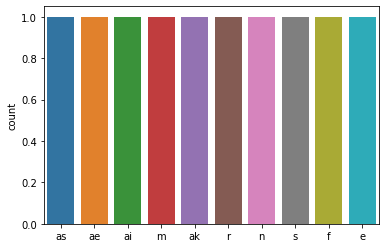

In [24]:
sns.countplot(x=top_10,data= data)